In [1]:
# Importer des modules nécessaires
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import seaborn as sns
import numpy as np
! pip install requests
! pip install bs4

In [4]:
# Le lien sujet de grattage 
url = "https://www.fleuriste.ca/francais/"

In [7]:
# Extraire le code html de la page en passant le lien du site en question
def extraction_contenu(url):
    response = get(url)
    content = response.content
    return content

In [8]:
# Extraire le code html de la page
def conversion_contenuGratter_To_dataFrame(url):
    
    content = extraction_contenu(url)
    soup = BeautifulSoup(content, 'html.parser')
    flowers_links = []
    rows = soup.find_all("div", class_='product-item-info')
    for row in rows:
        # extraction des URLs des fleurs  
        flowers_links.append(row.find("a", class_="product-item-photo").get('href'))
    flowers_name = []
    rows = soup.find_all("strong", class_='product-item-name')
    for row in rows:
        # Extraction des noms des fleurs 
        flowers_name.append(row.find("a", class_="product-item-link").text.strip())

    # Extraction et nettoyage des tableaux donnees prix
    flowers_price = []
    flowers_old_price = []
    flowers_special_price = []
    rows = soup.find_all("div", class_='price-box price-final_price')
    for row in rows:
        # Extraction et formattage des anciens prix et les prix des promotions suggérées
        flowers_old_price.append(row.find("span", class_="old-price").text.strip().replace('\xa0$','').replace(',','.'))
        flowers_special_price.append(row.find("span", class_="special-price").text.strip().replace('\xa0$','').replace(',','.'))
    
    # Calcul effectuer sur les tableaux donnees prix
    flowers_links = pd.Series(flowers_links, name = 'flowers_links')
    flowers_name = pd.Series(flowers_name, name = 'flowers_name')
    flowers_old_price = pd.to_numeric(pd.Series(flowers_old_price, name = 'flowers_old_price'))
    flowers_special_price = pd.to_numeric(pd.Series(flowers_special_price, name = 'flowers_special_price'))
    saved_price = pd.to_numeric(pd.Series([(x-y) for x,y in zip(flowers_old_price,flowers_special_price)], name = 'saved_price'))
    data1 = [flowers_name, flowers_old_price, flowers_special_price, saved_price, flowers_links]
    # convert list to DataFrame
    df = pd.concat(data1, axis=1)

    return df

In [9]:

conversion_contenuGratter_To_dataFrame(url)

,flowers_name,flowers_old_price,flowers_special_price,saved_price,flowers_links
0,Le bouquet dévoué,99.95,89.95,10.0,https://www.fleuriste.ca/francais/le-bouquet-e...
1,Lys orientaux melanges,54.95,44.95,10.0,https://www.fleuriste.ca/francais/lys-orientau...
2,Marguerites et roses rouges,59.95,49.95,10.0,https://www.fleuriste.ca/francais/marguerites-...
3,BOUQUET CONFECTION DU FLEURISTE,59.95,49.95,10.0,https://www.fleuriste.ca/francais/bouquet-conf...
4,Bouquet Douces Pensees,59.95,49.95,10.0,https://www.fleuriste.ca/francais/bouquet-douc...
5,Bouquet Lys roses dans un vase,69.95,59.95,10.0,https://www.fleuriste.ca/francais/bouquet-lys-...
6,Six roses rouges,69.95,59.95,10.0,https://www.fleuriste.ca/francais/six-roses-ro...
7,Plante Pachira Porte-Bonheur,69.95,59.95,10.0,https://www.fleuriste.ca/francais/plante-porte...
8,Bouquet Dentelle blanche,74.95,64.95,10.0,https://www.fleuriste.ca/francais/bouquet-dent...
9,Bouquet felicite florale,79.95,69.95,10.0,https://www.fleuriste.ca/francais/le-bouquet-b...


In [7]:
# On trie par la suite, et on affiche les 5 premiers prix les plus éconimisés de budget
df.sort_values(by='saved_price', ascending=False).head(5)

,flowers_name,flowers_old_price,flowers_special_price,saved_price,flowers_links
0,Le bouquet dévoué,99.95,89.95,10.0,https://www.fleuriste.ca/francais/le-bouquet-e...
21,corbeille Assortiment de fleurs blanches,79.95,69.95,10.0,https://www.fleuriste.ca/francais/la-corbeille...
23,Bouquet de pensees,79.95,69.95,10.0,https://www.fleuriste.ca/francais/bouquet-de-p...
24,Affection Eternelle,79.95,69.95,10.0,https://www.fleuriste.ca/francais/affection-et...
25,BOUQUET IDEE BRILLANTE,79.95,69.95,10.0,https://www.fleuriste.ca/francais/bouquet-idee...


<AxesSubplot:xlabel='flowers_special_price', ylabel='flowers_name'>

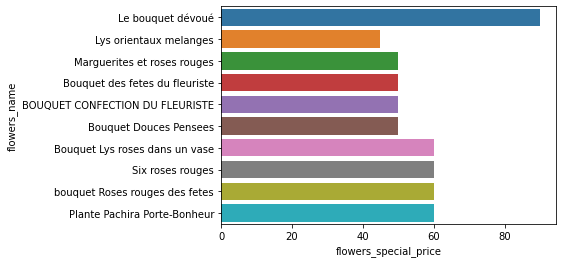

In [8]:
# Représenter graphiquement les 10 prix speciaux  par les noms des fleurs
sns.barplot(x="flowers_special_price", y="flowers_name", data=df.head(10))

In [9]:
#Écrivons maintenant le résultat dans un CSV

df.to_csv('recherche_info_flowers.csv') 

In [10]:
#2. Sauvegarder un dataframe  dans MongoDB
def stock_data_in_Mongodb(df):

    import json
    from pymongo import MongoClient
    !pip install json
    !pip install pymongo

    client = MongoClient('localhost', 27017)

    dbnames = client.list_database_names()
    if 'myDBFlowers' in dbnames:
        client.drop_database('myDBFlowers')
    db = client["myDB"]
    var_collection = db["mycollectionFlowers"]
    items = json.loads(df.T.to_json()).values()
    var_collection.insert(items)
    return db

ModuleNotFoundError: No module named 'pymongo'